In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np

# Generate some data:

In [2]:
from batchglm.api.models.nb_glm import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0, num_confounders=2)
# sample parameters from positive truncated N(1, 0.1)
mu=1; phi=0.1
sim.generate_params(rand_fn_loc=lambda size: mu + scipy.stats.truncnorm.rvs(-mu / phi, np.infty, scale=phi, size=size))
sim.generate_data()

# count data
X = sim.X
# sample description
sample_description = sim.sample_description

The sample description should be a pandas DataFrame with `num_observations` rows.
Each column should represent a property of the dataset.

The module `batchglm.api.data` contains some helper functions which can be useful to create this sample description:

- `sample_description_from_anndata()`
- `sample_description_from_xarray()`

In [3]:
sample_description

,condition
observations,
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,0


# Run differential expression test:

The wilcoxon test checks if two groups of samples differ significantly in one gene.

Therefore, it has to be provided with a parameter `grouping` which specifies the group membership of each sample.
It can be either the name of a column in `sample_description` or a vector of length `num_observations`.


In [4]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

import diffxpy as de

test = de.test_wilcoxon(
    data=X,
    grouping="condition",
    sample_description=sample_description
)


# Obtaining the results

The p-/q-values can be obtained by calling test.pval / test.qval:

In [5]:
test.qval


array([  2.04707539e-02,   1.28338140e-01,   6.41269983e-21,
         3.68472006e-02,   5.08518353e-01,   9.15016865e-01,
         2.43063339e-07,   1.46695252e-10,   1.36054458e-01,
         3.55844088e-01,   5.04092715e-01,   1.60184105e-07,
         2.04707539e-02,   1.44093013e-21,   1.03792482e-02,
         6.28406635e-02,   1.76524896e-14,   2.42110292e-01,
         2.44430599e-09,   5.50342909e-01,   6.37767664e-01,
         2.48874517e-01,   9.08913826e-07,   9.80624068e-25,
         4.83401581e-01,   5.50342909e-01,   2.38025758e-03,
         2.04707539e-02,   9.60012245e-06,   6.36076068e-01,
         1.76843311e-08,   2.13897095e-12,   9.40781213e-14,
         3.23720024e-09,   2.27995214e-07,   2.47239105e-03,
         6.11723965e-01,   2.30324679e-01,   4.70064204e-02,
         2.38025758e-03,   8.64912374e-01,   9.23448266e-02,
         1.28978803e-78,   1.85152717e-05,   5.95550964e-35,
         3.74209725e-01,   6.95050464e-06,   4.88810764e-02,
         3.51959701e-01,

test.summary() returns a pandas DataFrame with a quick overview of the test results:

In [6]:
test.summary()

,gene,pval,qval,log2fc
0,0,1.269187e-02,2.047075e-02,-0.051747
1,1,9.753699e-02,1.283381e-01,-0.049692
2,2,5.130160e-22,6.412700e-21,-0.195787
3,3,2.321374e-02,3.684720e-02,-0.053185
4,4,4.678369e-01,5.085184e-01,-0.025331
5,5,9.150169e-01,9.150169e-01,-0.023727
6,6,8.021090e-08,2.430633e-07,0.087310
7,7,2.493819e-11,1.466953e-10,0.121537
8,8,1.061225e-01,1.360545e-01,0.019723
9,9,3.095844e-01,3.558441e-01,-0.042252


- `gene`: gene name / identifier
- `pval`: p-value of the gene
- `qval`: multiple testing - corrected p-value of the gene
- `log2fc`: log_2 fold change between `no coefficient` and `coefficient`

`test.plot_volcano()` creates a volcano plot of p-values vs. fold-change:

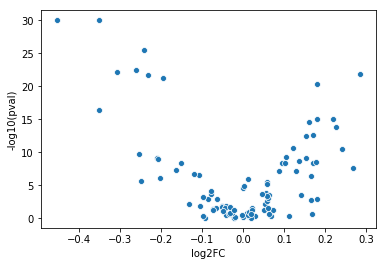

In [7]:
test.plot_volcano()
plt.show()

`plot_vs_ttest()` shows the correlation between t-test p-values and the wald test p-values

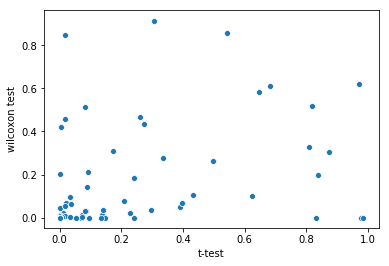

In [8]:
test.plot_vs_ttest()
plt.show()

`test.plot_diagnostics()` is a shortcut to directly show all diagnostics plots.